In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\kotesh Reddy\Downloads\archive (19)\riceClassification.csv")

In [3]:
df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [5]:
df.isnull().sum()

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop("id",axis=1,inplace=True)

In [8]:
df.corr()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
Area,1.000000,0.599939,0.930215,-0.550073,0.999362,0.998158,0.230541,0.881540,0.620490,-0.623979,-0.816589
MajorAxisLength,0.599939,1.000000,0.273211,0.295717,0.602061,0.618002,-0.073549,0.870178,-0.202566,0.240471,-0.147741
MinorAxisLength,0.930215,0.273211,1.000000,-0.808640,0.928992,0.923790,0.308541,0.674249,0.834398,-0.860516,-0.917766
Eccentricity,-0.550073,0.295717,-0.808640,1.000000,-0.547896,-0.534688,-0.329954,-0.165915,-0.903657,0.950301,0.788636
ConvexArea,0.999362,0.602061,0.928992,-0.547896,1.000000,0.997403,0.227359,0.886987,0.610236,-0.621472,-0.814214
EquivDiameter,0.998158,0.618002,0.923790,-0.534688,0.997403,1.000000,0.225944,0.891567,0.607432,-0.609957,-0.809361
Extent,0.230541,-0.073549,0.308541,-0.329954,0.227359,0.225944,1.000000,0.073227,0.366793,-0.350875,-0.303440
Perimeter,0.881540,0.870178,0.674249,-0.165915,0.886987,0.891567,0.073227,1.000000,0.186063,-0.227256,-0.533274
Roundness,0.620490,-0.202566,0.834398,-0.903657,0.610236,0.607432,0.366793,0.186063,1.000000,-0.947875,-0.831759
AspectRation,-0.623979,0.240471,-0.860516,0.950301,-0.621472,-0.609957,-0.350875,-0.227256,-0.947875,1.000000,0.832563


In [9]:
#Check if data is balanced
df["Class"].value_counts()

1    9985
0    8200
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

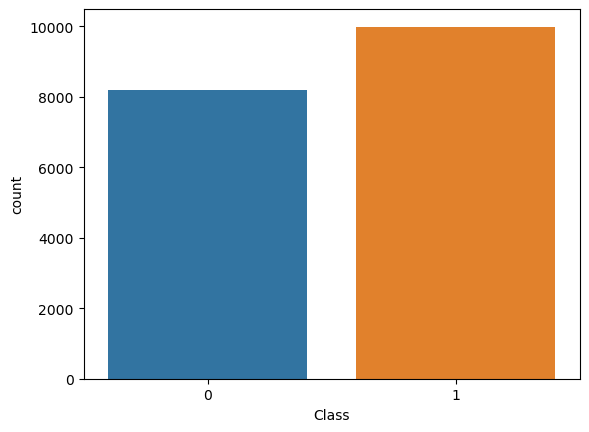

In [10]:
sns.countplot(data = df,x = "Class")

<AxesSubplot:>

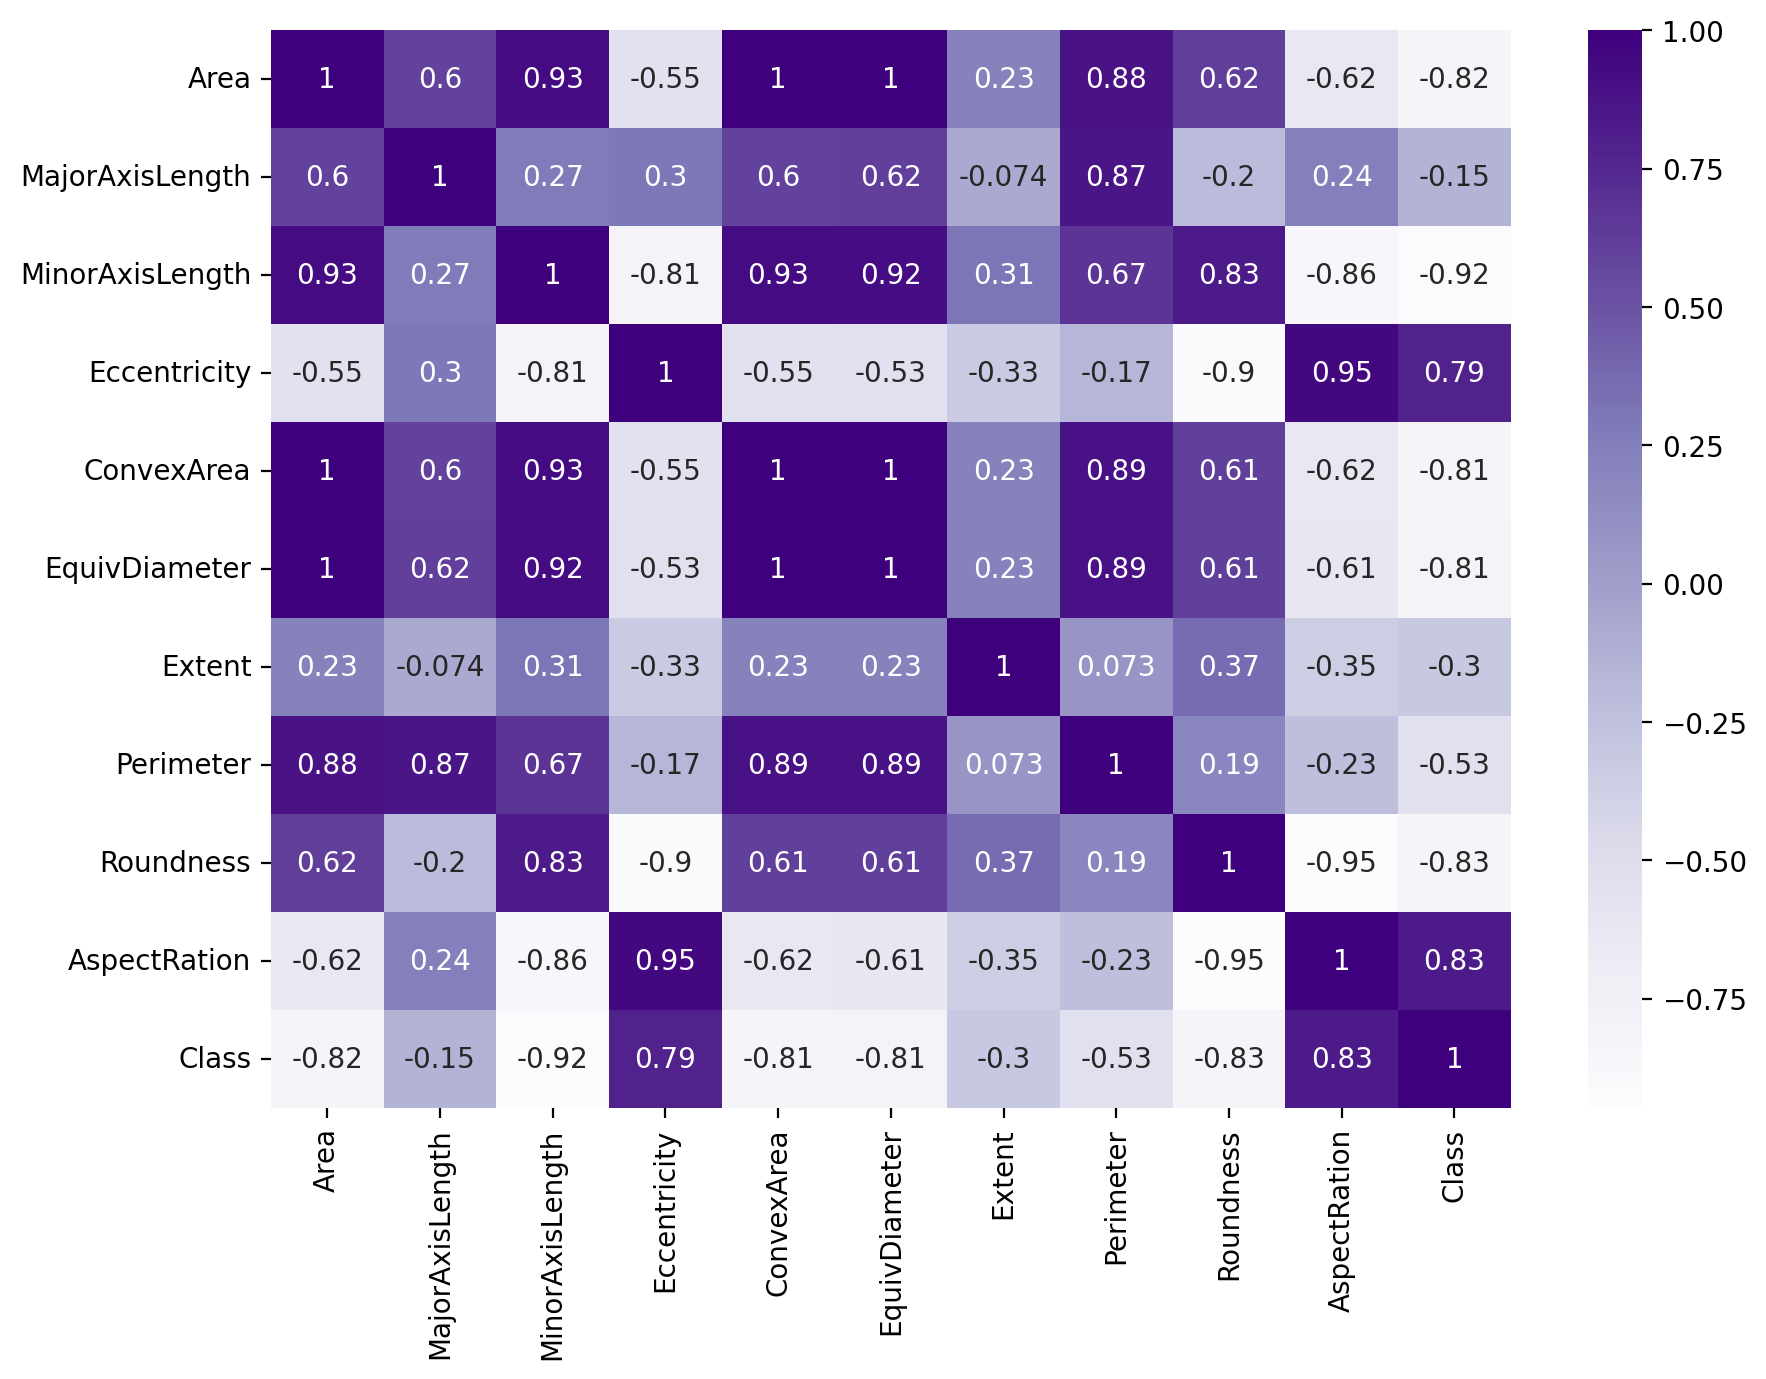

In [11]:
plt.figure(figsize=(10,7),dpi=200)
sns.heatmap(df.corr(),cmap="Purples",annot=True)

<AxesSubplot:>

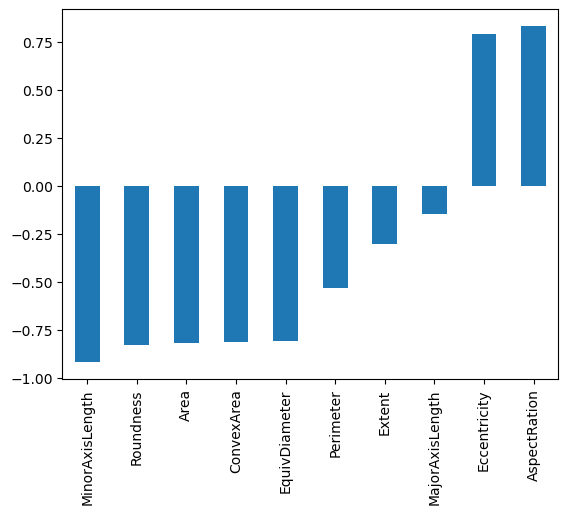

In [12]:
df.corr()["Class"].sort_values()[:-1].plot(kind="bar")

C:\Users\kotesh Reddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Perimeter'>

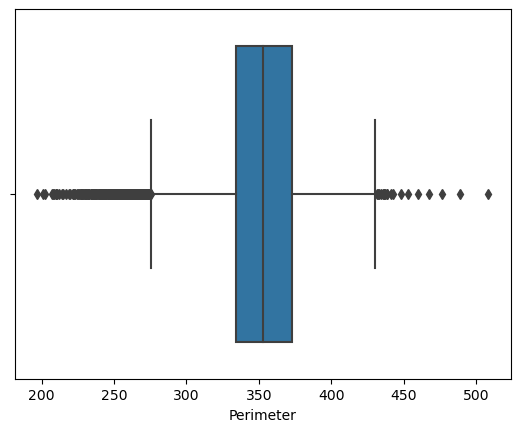

In [13]:
#Check for the outliers
sns.boxplot(df["Perimeter"])

In [14]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


In [15]:
#using the IQR method
Q1 = df['Perimeter'].quantile(0.25)
Q3 = df['Perimeter'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [16]:
upper_bound

431.5224999999999

In [17]:
lower_bound

275.4705

In [18]:
def cap(data):
    if data>upper_bound:
        data = upper_bound
    elif data<lower_bound:
        data = lower_bound

    return data  

In [19]:
df["Perimeter"] = df["Perimeter"].apply(cap)

C:\Users\kotesh Reddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Perimeter'>

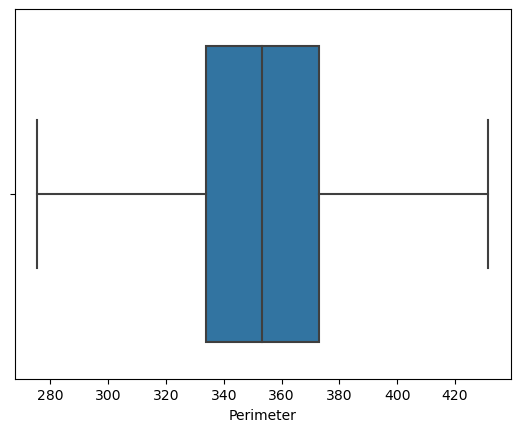

In [20]:
sns.boxplot(df["Perimeter"])

In [21]:
#Model
X = df.drop("Class",axis=1)
y = df["Class"]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [25]:
scaler = StandardScaler()

In [26]:
knn = KNeighborsClassifier()

In [27]:
svc = SVC()

In [28]:
log = LogisticRegression()

In [29]:
X_train = scaler.fit_transform(X_train)

In [30]:
X_test = scaler.transform(X_test)

In [31]:
models = {
    'Logistic Regression': {
        'model': log,
        'param_grid': {"penalty" : ['l1', 'l2', 'elasticnet'],
                       "C":[0.1,0.5,1,2,5]}  # Add hyperparameters for Linear Regression if needed
    },
    'KNN': {
        'model': knn,
        'param_grid': {
            'n_neighbors': [2,5,10,20]
        }
    },
    'Support Vector Machine': {
        'model': svc,
        'param_grid': {
            'C': [1, 10],
            'kernel': ['rbf', 'poly'],
            'gamma': ['scale', 'auto']
        }
    }
}

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
best_models = {}

# Loop through each model and perform GridSearchCV
for model_name, model_info in models.items():
    model = model_info['model']
    param_grid = model_info['param_grid']
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)
    
    grid_search.fit(X_train, y_train)
    
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    best_models[model_name] = {'best_params': best_params, 'best_model': best_model}
    

Fitting 3 folds for each of 15 candidates, totalling 45 fits


C:\Users\kotesh Reddy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kotesh Reddy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kotesh Reddy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\kotesh Reddy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solve

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [35]:
best_models

{'Logistic Regression': {'best_params': {'C': 1, 'penalty': 'l2'},
  'best_model': LogisticRegression(C=1)},
 'KNN': {'best_params': {'n_neighbors': 20},
  'best_model': KNeighborsClassifier(n_neighbors=20)},
 'Support Vector Machine': {'best_params': {'C': 10,
   'gamma': 'scale',
   'kernel': 'rbf'},
  'best_model': SVC(C=10)}}

In [36]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix

In [37]:
y_pred = grid_search.predict(X_test)

In [38]:
#For Logistic regression
print("R2 Score: ",r2_score(y_test,y_pred))
print("Mean absolute error: ",mean_absolute_error(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

R2 Score:  0.9629500002919996
Mean absolute error:  0.009164222873900294
0.9908357771260997
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2447
           1       0.99      0.99      0.99      3009

    accuracy                           0.99      5456
   macro avg       0.99      0.99      0.99      5456
weighted avg       0.99      0.99      0.99      5456



In [39]:
from sklearn.metrics import plot_confusion_matrix

C:\Users\kotesh Reddy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


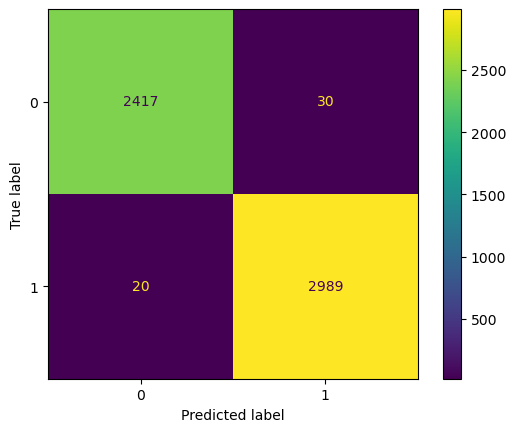

In [41]:
plot_confusion_matrix(grid_search,X_test,y_test)